# <font size="+5" color=orange ><b> <u> Covid - 19 Clinical Analysis      </u></b></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

warnings.filterwarnings("ignore")
%matplotlib inline
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
#plt.style.use('fivethirtyeight')

In [2]:
df_1 = pd.read_excel('F:/documents/project personal learning/waseem/COVID-19 Clinical Data Repository.xlsx',sheet_name=0)
df_2 = pd.read_excel('F:/documents/project personal learning/waseem/COVID-19 Clinical Data Repository.xlsx',sheet_name=1)
df_3 = pd.read_excel('F:/documents/project personal learning/waseem/COVID-19 Clinical Data Repository.xlsx',sheet_name=2)

print(df_1.shape)
print(df_2.shape)
print(df_3.shape)

data = pd.concat([df_1,df_2,df_3],axis = 0,ignore_index=True) # concatinating the multiple files
print(data.shape)

labelencoder = LabelEncoder()

(922, 45)
(367, 45)
(322, 45)
(1611, 45)


In [3]:
data

,date_published,clinic_state,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_link,er_referral
0,2020-04-07,CA,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,36,1.0,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2020-04-07,CA,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,35,0.0,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2020-04-07,CA,SARS COV 2 RNA RTPCR,Oropharyngeal,Negative,18,1.0,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2020-04-07,CA,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,46,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,2020-04-07,CA,SARS COV 2 RNA RTPCR,Nasopharyngeal,Negative,29,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,2020-04-21,CA,Rapid COVID-19 Test,Nasal,Negative,69,0.0,0.0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1607,2020-04-21,CA,Rapid COVID-19 Test,Nasal,Negative,48,0.0,0.0,False,False,...,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,False
1608,2020-04-21,CA,Rapid COVID-19 Test,Nasal,Negative,31,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1609,2020-04-21,CA,Rapid COVID-19 Test,Nasal,Negative,30,0.0,0.0,False,False,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,False


In [4]:
total = data.isnull().sum().sort_values(ascending=False) # missing values analysis
total

rapid_strep_results              1549
rapid_flu_results                1444
loss_of_taste                    1430
loss_of_smell                    1426
diarrhea                         1376
runny_nose                       1363
cxr_impression                   1310
cxr_findings                     1310
muscle_sore                      1309
cxr_link                         1307
sore_throat                      1294
headache                         1232
fatigue                          1209
sob_severity                     1184
fever                             913
cough_severity                    902
high_risk_interactions            892
days_since_symptom_onset          800
high_risk_exposure_occupation     463
cough                             352
sob                               352
rhonchi                           341
rr                                339
wheezes                           310
ctab                              191
sats                              117
labored_resp

In [5]:
data.isnull().values.sum() # total missing count

25192

In [6]:
data.dtypes.value_counts() # data feature types 


float64           24
object            11
bool               8
int64              1
datetime64[ns]     1
dtype: int64

# <font size="+2" color=orange ><b> <u> Missing values      </u></b></font>

In [7]:
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False) # percentage of missing values 
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
rapid_strep_results,1549,0.961515
rapid_flu_results,1444,0.896338
loss_of_taste,1430,0.887647
loss_of_smell,1426,0.885164
diarrhea,1376,0.854128
runny_nose,1363,0.846058
cxr_impression,1310,0.813160
cxr_findings,1310,0.813160
muscle_sore,1309,0.812539
cxr_link,1307,0.811297


# <font size="+2" color=orange ><b> <u> Feature Engineering </u></b></font>

# <font size="+0.5" color=orange ><b>  Covid19 Test Results </b></font>

In [8]:
print(data.covid19_test_results.unique())

['Negative' 'Positive' 'Other']


In [9]:
data.groupby('covid19_test_results')['date_published'].count()

covid19_test_results
Negative    1509
Other          1
Positive     101
Name: date_published, dtype: int64

In [10]:
data.loc[data['covid19_test_results'] == 'Other'] # indicating the outlier with as OTHERS in results

,date_published,clinic_state,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_link,er_referral
305,2020-04-07,CA,SARS COV 2 RNA RTPCR,Nasopharyngeal,Other,33,1.0,1.0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [11]:
data = data[data.covid19_test_results != 'Other'] # droppping the 'Other' variable outlier
data.covid19_test_results.unique()

array(['Negative', 'Positive'], dtype=object)

# <font size="+0.5" color=orange ><b>  Date Published </b></font>

In [12]:
data[['covid19_test_results','date_published']].groupby(['date_published'],as_index = False).count()
# checking number of patients date wise

,date_published,covid19_test_results
0,2020-04-07,921
1,2020-04-14,367
2,2020-04-21,322


In [13]:
data = data.drop('date_published',axis=1)
# There are just  link which resembles to the cxr_impression

# <font size="+0.5" color=orange ><b>  Autoimmune Disease </b></font>

In [14]:
 data.autoimmune_dis.unique()
# Unique values 

array([False,  True])

In [15]:
data.autoimmune_dis.isnull().sum()
# missing values check

0

In [16]:
data.autoimmune_dis.value_counts() 
# highly skewed

False    1605
True        5
Name: autoimmune_dis, dtype: int64

In [17]:
data.autoimmune_dis = labelencoder.fit_transform(data.autoimmune_dis)
data.autoimmune_dis.astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
1606    0
1607    0
1608    0
1609    0
1610    0
Name: autoimmune_dis, Length: 1610, dtype: int32

# <font size="+0.5" color=orange ><b>   Chronic obstructive pulmonary disease (copd) </b></font>

In [18]:
data.copd.value_counts() 
# patients with chronic obstructive pulmonary disease 

False    1596
True       14
Name: copd, dtype: int64

In [19]:
data.copd.isnull().sum()
#missing values

0

In [20]:
data.copd = labelencoder.fit_transform(data.copd)
data.copd.astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
1606    0
1607    0
1608    0
1609    0
1610    0
Name: copd, Length: 1610, dtype: int32

# <font size="+0.5" color=orange ><b>   Asthma </b></font>

In [21]:
data.asthma.value_counts()
# patients with Asthma

False    1367
True      243
Name: asthma, dtype: int64

In [22]:
data.asthma.isnull().sum()
# missing count

0

In [23]:
data.asthma = labelencoder.fit_transform(data.asthma)
data.asthma.astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
1606    0
1607    0
1608    0
1609    0
1610    0
Name: asthma, Length: 1610, dtype: int32

# <font size="+0.5" color=orange ><b>  Cancer </b></font>

In [24]:
data.cancer.value_counts()

False    1574
True       36
Name: cancer, dtype: int64

In [25]:
data.cancer.isnull().sum()
# missing count

0

In [26]:
data.cancer = labelencoder.fit_transform(data.cancer)
data.cancer.astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
1606    0
1607    0
1608    0
1609    0
1610    0
Name: cancer, Length: 1610, dtype: int32

# <font size="+0.5" color=orange ><b>  HyperTension </b></font>

In [27]:
data.htn.value_counts()

False    1430
True      180
Name: htn, dtype: int64

In [28]:
data.htn.isnull().sum()

0

In [29]:
data.htn = labelencoder.fit_transform(data.htn)
data.htn.astype(int)
data.htn.unique()

array([0, 1], dtype=int64)

# <font size="+0.5" color=orange ><b>  Coronary Heart Disease </b></font>

In [30]:
data.chd.value_counts()

False    1589
True       21
Name: chd, dtype: int64

In [31]:
data.chd.isnull().sum()

0

In [32]:
data.chd = labelencoder.fit_transform(data.chd)
data.chd.astype(int)
data.chd.unique()

array([0, 1], dtype=int64)

# <font size="+0.5" color=orange ><b>  Diabetes </b></font>

In [33]:
data.diabetes.value_counts()

False    1518
True       92
Name: diabetes, dtype: int64

In [34]:
data.diabetes.isnull().sum()

0

In [35]:
data.diabetes = labelencoder.fit_transform(data.diabetes)
data.diabetes.astype(int)
data.diabetes.unique()

array([0, 1], dtype=int64)

# <font size="+0.5" color=orange ><b>  ER Referral </b></font>

In [36]:
data.er_referral.value_counts()

False    1610
Name: er_referral, dtype: int64

In [37]:
data = data.drop('er_referral',axis=1) 
# As none of the patients were sent home so we just drop this feature
data.shape

(1610, 43)

# <font size="+0.5" color=orange ><b>  Age </b></font>

In [38]:
data.age.unique()

array([36, 35, 18, 46, 29, 21, 38, 44, 24, 28, 37, 27, 54, 75, 50,  2, 19,
       22, 70, 69, 25, 23, 66, 33, 63, 47, 65, 40, 41, 31, 60,  5, 58, 34,
       39, 62, 13, 32, 73, 17, 26, 30, 55, 42, 53, 64, 78,  3, 12, 56, 45,
       61, 43, 48, 52, 51, 68, 59, 20, 49, 77, 57, 16,  8, 67, 82, 74, 83,
       81, 71, 76, 85, 72,  9, 79, 90, 11, 14,  0, 15, 80,  4],
      dtype=int64)

In [39]:
data.age.isnull().sum()

0

Text(0.5, 1.0, 'Age Distribution')

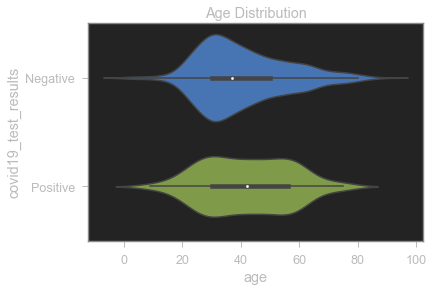

In [40]:
sns.violinplot(x=data.age, y=data.covid19_test_results)
plt.title('Age Distribution')
# it can be visualized that mostly patients negative belongs to age between 20 to 40 

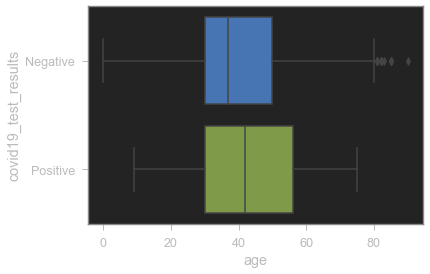

In [41]:
sns.boxplot(x=data.age, y=data.covid19_test_results)

In [42]:
data.age.describe()

count    1610.000000
mean       40.627329
std        15.194418
min         0.000000
25%        30.000000
50%        38.000000
75%        50.000000
max        90.000000
Name: age, dtype: float64

# <font size="+0.5" color=orange ><b>  Sample Location Area </b></font>

In [43]:
data.swab_type.value_counts()

Nasopharyngeal    750
Nasal             540
Oropharyngeal     320
Name: swab_type, dtype: int64

In [44]:
data.swab_type.isnull().sum()

0

In [45]:
labelencoder = LabelEncoder()
data.swab_type = labelencoder.fit_transform(data.swab_type)
# Converting Categorical variable to integar
data.swab_type.astype(int)
data.swab_type.unique()

array([1, 2, 0], dtype=int64)

# <font size="+0.5" color=orange ><b>  Test Name  </b></font>

In [46]:
data.test_name.value_counts()

Rapid COVID-19 Test     659
SARS CoV w/CoV 2 RNA    455
SARS COV 2 RNA RTPCR    414
SARS-CoV-2, NAA          76
SARS COV2 NAAT            6
Name: test_name, dtype: int64

In [47]:
data.test_name.isnull().sum()
# missing values

0

In [48]:
data.test_name = labelencoder.fit_transform(data.test_name)
# Converting Categorical variable to integar
data.test_name.astype(int)
data.test_name.unique()

array([3, 1, 4, 0, 2], dtype=int64)

# <font size="+0.5" color=orange ><b>  Clinic State  </b></font>

In [49]:
data.clinic_state.value_counts()

CA    1610
Name: clinic_state, dtype: int64

In [50]:
data = data.drop('clinic_state',axis=1)
# As there is no other state so this feature seems useless and have no insights

# <font size="+0.5" color=orange ><b>  Temperature  </b></font>

In [51]:
data.temperature.describe()

count    1533.000000
mean       36.940150
std         0.366842
min        35.650000
25%        36.750000
50%        36.900000
75%        37.100000
max        39.350000
Name: temperature, dtype: float64

Text(0.5, 1.0, 'Temperature Distribution')

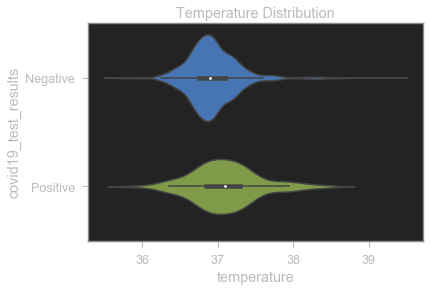

In [52]:
sns.violinplot(x=data.temperature, y=data.covid19_test_results)
plt.title('Temperature Distribution')

Text(0.5, 1.0, 'Temperature Distribution')

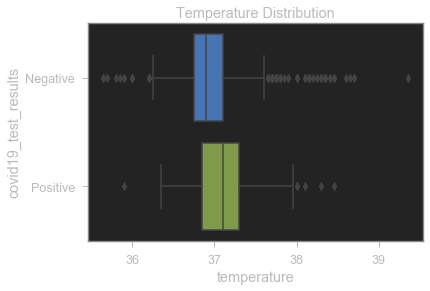

In [53]:
sns.boxplot(x=data.temperature, y=data.covid19_test_results)
plt.title('Temperature Distribution')

In [54]:
data.loc[data['covid19_test_results'] == 'Negative' ].temperature.isnull().sum()
# missing Values for Negative patients

71

In [55]:
data.loc[data['covid19_test_results'] == 'Positive' ].temperature.isnull().sum()
# Missing values for Positive patients

6

In [56]:
mean_pos = data.loc[data['covid19_test_results'] == 'Positive' ].temperature.median()
# Median for Positive Patients and median because of outliars
mean_pos

37.1

In [57]:
mean_neg = data.loc[data['covid19_test_results'] == 'Negative' ].temperature.median()
# Median for Positive Patients and median because of outliars
mean_neg

36.9

In [58]:
m1 = data['covid19_test_results'] == 'Negative' # masking with respect to the Neative Group

In [59]:
m2 = data['covid19_test_results'] == 'Positive' # masking with repect to th epositive Group

In [60]:
data.loc[m1 , 'temperature'] = data.loc[m1 , 'temperature'].fillna(mean_neg) # filling median value

In [61]:
data.loc[m2 , 'temperature'] = data.loc[m2 , 'temperature'].fillna(mean_pos) #filling ,edina value

In [62]:
data.temperature.isnull().sum() # missing count

0

In [63]:
data.temperature.unique()

array([36.75, 37.25, 37.1 , 36.7 , 36.9 , 36.85, 36.65, 36.95, 36.45,
       36.  , 38.35, 37.15, 38.  , 37.6 , 37.  , 37.45, 36.8 , 36.2 ,
       36.25, 37.2 , 37.9 , 36.35, 36.6 , 37.35, 36.5 , 37.4 , 37.3 ,
       36.3 , 37.8 , 36.4 , 37.5 , 37.85, 35.8 , 38.45, 37.75, 38.3 ,
       37.65, 39.35, 38.25, 35.9 , 38.7 , 37.7 , 38.4 , 38.65, 35.65,
       35.7 , 38.1 , 38.15, 35.85, 38.6 , 38.2 , 37.95])

# <font size="+0.5" color=orange ><b>  Systolic blood pressure measured  </b></font>

In [64]:
data.sys.describe()

count    1513.000000
mean      127.062789
std        16.397893
min        81.000000
25%       116.000000
50%       126.000000
75%       137.000000
max       205.000000
Name: sys, dtype: float64

In [65]:
data.sys.isnull().sum()

97

Text(0.5, 1.0, 'Temperature Distribution')

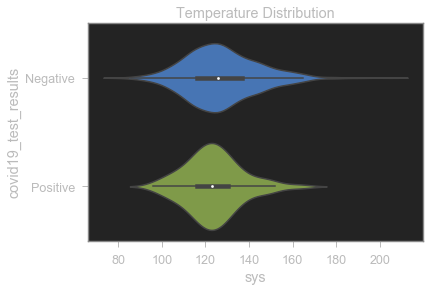

In [66]:
sns.violinplot(x=data.sys, y=data.covid19_test_results)
plt.title('Temperature Distribution')

Text(0.5, 1.0, 'Temperature Distribution')

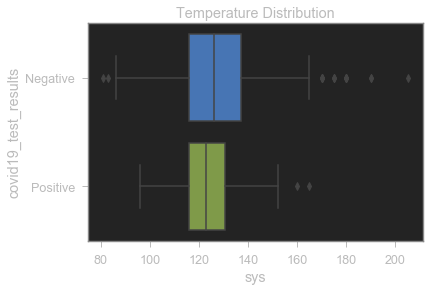

In [67]:
sns.boxplot(x=data.sys, y=data.covid19_test_results)
plt.title('Temperature Distribution')

In [68]:
data.loc[data['covid19_test_results'] == 'Negative' ].sys.isnull().sum()
# missing Values for Negative patients mean would be suitble due to less outliars

91

In [69]:
data.loc[data['covid19_test_results'] == 'Positive' ].sys.isnull().sum()
# Missing values for Positive patients mean would be suitble due to less outliars

6

In [70]:
mean_pos_sys = data.loc[data['covid19_test_results'] == 'Positive' ].sys.mean()
# Mean for Positive Patients
mean_pos_sys

123.82105263157895

In [71]:
mean_neg_sys = data.loc[data['covid19_test_results'] == 'Negative' ].sys.mean()
# Mean for Positive Patients
mean_neg_sys

127.27997179125529

In [72]:
data.loc[m1 , 'sys'] = data.loc[m1 , 'sys'].fillna(mean_neg_sys) # filling mean value
data.loc[m2 , 'sys'] = data.loc[m2 , 'sys'].fillna(mean_pos_sys) # filling mean value

In [73]:
data.sys.isnull().sum()
data.sys.astype(int)

0       141
1       136
2       108
3       137
4       118
       ... 
1606    114
1607    120
1608    124
1609    154
1610    143
Name: sys, Length: 1610, dtype: int32

# <font size="+0.5" color=orange ><b>  Diarrhea  </b></font>

In [74]:
data.dia.describe()

count    1513.000000
mean       80.217449
std         9.971370
min        43.000000
25%        74.000000
50%        80.000000
75%        86.000000
max       135.000000
Name: dia, dtype: float64

In [75]:
data.dia.isnull().sum()

97

Text(0.5, 1.0, 'Diarrhea Distribution')

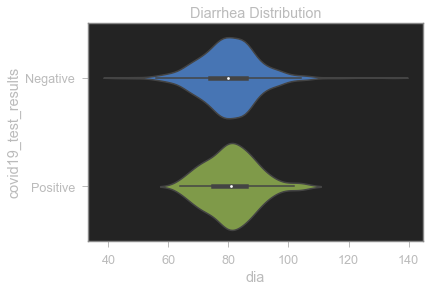

In [76]:
sns.violinplot(x=data.dia, y=data.covid19_test_results)
plt.title('Diarrhea Distribution')

Text(0.5, 1.0, 'Diarrhea Distribution')

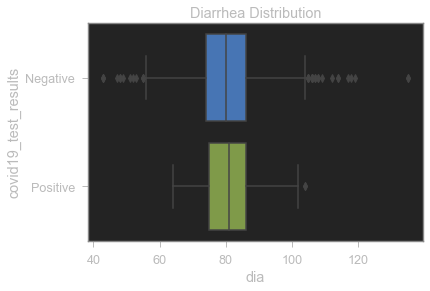

In [77]:
sns.boxplot(x=data.dia, y=data.covid19_test_results)
plt.title('Diarrhea Distribution')

In [78]:
data.loc[data['covid19_test_results'] == 'Negative' ].dia.isnull().sum()
# missing Values for Negative patients

91

In [79]:
data.loc[data['covid19_test_results'] == 'Positive' ].dia.isnull().sum()
# Missing values for Positive patients

6

In [80]:
mean_pos_dia = data.loc[data['covid19_test_results'] == 'Positive' ].dia.median()
# Median for Positive Patients median because of excessiove outliars
mean_pos_dia

81.0

In [81]:
mean_neg_dia = data.loc[data['covid19_test_results'] == 'Negative' ].dia.median()
# Median for Positive Patients median because of excessive outliars
mean_neg_dia

80.0

In [82]:
data.loc[m1 , 'dia'] = data.loc[m1 , 'dia'].fillna(mean_neg_dia) # filling median value
data.loc[m2 , 'dia'] = data.loc[m2 , 'dia'].fillna(mean_pos_dia) # filling median value

In [83]:
data.dia.isnull().sum()

0

In [84]:
data.dia.astype(int)
data.dia.unique()

array([ 90.,  82.,  69.,  85.,  73.,  88.,  78.,  66.,  79.,  87.,  93.,
        80.,  75.,  70.,  83.,  57.,  81.,  67.,  77.,  63., 104.,  86.,
        76., 101., 106.,  53.,  84.,  92.,  71.,  72.,  94.,  60., 103.,
       100.,  99.,  64.,  74., 105.,  68.,  59.,  89., 117.,  58.,  65.,
        62., 118.,  95.,  96.,  56.,  98., 135., 107.,  97.,  52.,  48.,
       109.,  91., 119.,  61., 112.,  55.,  47., 114.,  51., 102.,  49.,
        43., 108.])

# <font size="+0.5" color=orange ><b>  Pulse  </b></font>

In [85]:
data.pulse.describe()

count    1511.000000
mean       83.510920
std        14.792283
min        48.000000
25%        73.000000
50%        82.000000
75%        93.000000
max       165.000000
Name: pulse, dtype: float64

In [86]:
data.pulse.isnull().sum()

99

Text(0.5, 1.0, 'Pulse Distribution')

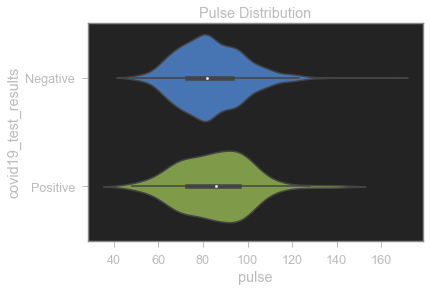

In [87]:
sns.violinplot(x=data.pulse, y=data.covid19_test_results)
plt.title('Pulse Distribution')

Text(0.5, 1.0, 'Pulse Distribution')

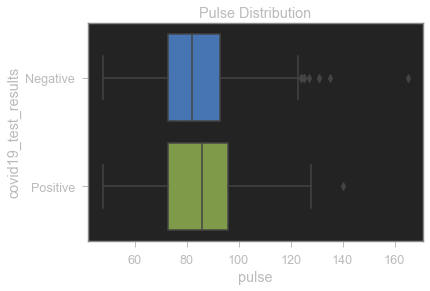

In [88]:
sns.boxplot(x=data.pulse, y=data.covid19_test_results)
plt.title('Pulse Distribution')

In [89]:
data.loc[data['covid19_test_results'] == 'Negative' ].pulse.isnull().sum()
# missing Values for Negative patients

96

In [90]:
data.loc[data['covid19_test_results'] == 'Positive' ].pulse.isnull().sum()
# Missing values for Positive patients

3

In [91]:
mean_pos_p = data.loc[data['covid19_test_results'] == 'Positive' ].pulse.mean()
# Mean for Positive Patients
mean_pos_p

85.24489795918367

In [92]:
mean_neg_p = data.loc[data['covid19_test_results'] == 'Negative' ].pulse.median()
# Mean for Positive Patients 
mean_neg_p

82.0

In [93]:
data.loc[m1 , 'pulse'] = data.loc[m1 , 'pulse'].fillna(mean_neg_p) # filling median value
data.loc[m2 , 'pulse'] = data.loc[m2 , 'pulse'].fillna(mean_pos_p) # filling median value

In [94]:
data.pulse.isnull().sum()

0

In [95]:
data.pulse.astype(int)

0       106
1        68
2        95
3        95
4        75
       ... 
1606     69
1607     95
1608     83
1609     96
1610    103
Name: pulse, Length: 1610, dtype: int32

# <font size="+0.5" color=orange ><b>  Labored Respiration  </b></font>

In [96]:
data.labored_respiration.value_counts()

0.0    1496
1.0       7
Name: labored_respiration, dtype: int64

In [97]:
data.labored_respiration.unique()

array([ 0., nan,  1.])

In [98]:
data.labored_respiration.isnull().sum() 
# missing values

107

In [99]:
data.labored_respiration = data.labored_respiration.fillna(0)
# missing missing values with false

In [100]:
data.labored_respiration.isnull().sum()

0

In [101]:
data.labored_respiration = labelencoder.fit_transform(data.labored_respiration)
data.labored_respiration.astype(int)
data.labored_respiration.unique()

array([0, 1], dtype=int64)

In [102]:
data.labored_respiration.value_counts()

0    1603
1       7
Name: labored_respiration, dtype: int64

# <font size="+0.5" color=orange ><b>  Oxygen Saturation </b></font>

In [103]:
data.sats.describe()

count    1493.000000
mean       97.931681
std         1.493738
min        91.000000
25%        97.000000
50%        98.000000
75%        99.000000
max       100.000000
Name: sats, dtype: float64

In [104]:
data.sats.isnull().sum()

117

Text(0.5, 1.0, 'Sats Distribution')

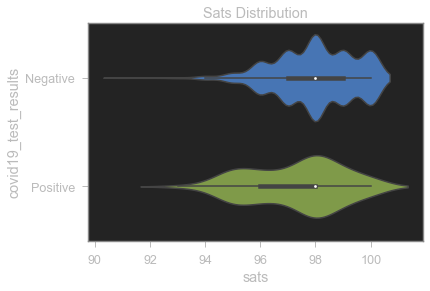

In [105]:
sns.violinplot(x=data.sats, y=data.covid19_test_results)
plt.title('Sats Distribution')

Text(0.5, 1.0, 'Sats Distribution')

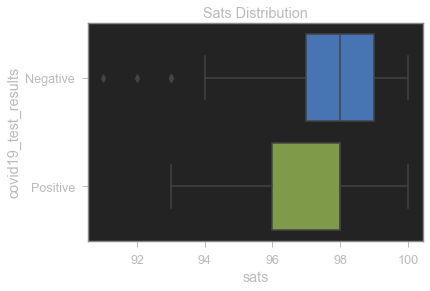

In [106]:
sns.boxplot(x=data.sats, y=data.covid19_test_results)
plt.title('Sats Distribution')

In [107]:
data.loc[data['covid19_test_results'] == 'Negative' ].sats.isnull().sum()
# missing Values for Negative patients

112

In [108]:
data.loc[data['covid19_test_results'] == 'Positive' ].sats.isnull().sum()
# Missing values for Positive patients

5

In [109]:
mean_pos_s = data.loc[data['covid19_test_results'] == 'Positive' ].sats.mean()
# Mean for Positive Patients
mean_pos_s

97.28125

In [110]:
mean_neg_s = data.loc[data['covid19_test_results'] == 'Negative' ].sats.mean()
# Mean for Positive Patients 
mean_neg_s

97.97637795275591

In [111]:
data.loc[m1 , 'sats'] = data.loc[m1 , 'sats'].fillna(mean_neg_s) # filling mean value
data.loc[m2 , 'sats'] = data.loc[m2 , 'sats'].fillna(mean_pos_s) # filling mean value

In [112]:
data.sats.isnull().sum()

0

In [113]:
data.sats.astype(int)
data.sats.unique()

array([100.        ,  97.        ,  99.        ,  96.        ,
        98.        ,  91.        ,  97.97637795,  95.        ,
        94.        ,  97.28125   ,  92.        ,  93.        ])

# <font size="+0.5" color=orange ><b>  Ctab </b></font>

In [114]:
data.ctab.value_counts()

1.0    1324
0.0      95
Name: ctab, dtype: int64

In [115]:
data.ctab.isnull().sum()
# missing values

191

In [116]:
data.loc[data['covid19_test_results'] == 'Negative' ].ctab.isnull().sum()

183

In [117]:
data.loc[data['covid19_test_results'] == 'Positive' ].ctab.isnull().sum()

8

In [118]:
data.loc[data['covid19_test_results'] == 'Negative' ].ctab.mode()
# analyzing the mode for negative patients

0    1.0
dtype: float64

In [119]:
data.loc[data['covid19_test_results'] == 'Positive' ].ctab.mode()
# analyzing the mode for positive patients

0    1.0
dtype: float64

In [120]:
data.ctab = data.ctab.fillna(1.0)
# Filling with False the missing values

In [121]:
data.ctab.isnull().sum()

0

In [122]:
data.ctab = labelencoder.fit_transform(data.ctab)
data.ctab.astype(int)
data.ctab.unique()

array([1, 0], dtype=int64)

# <font size="+0.5" color=orange ><b>  Wheezes ( high-pitched whistling sound) </b></font>

In [123]:
data.wheezes.value_counts()

0.0    1234
1.0      66
Name: wheezes, dtype: int64

In [124]:
data.wheezes = data.wheezes.fillna(1.0)
# Filling with False the missing values

In [125]:
data.wheezes = labelencoder.fit_transform(data.wheezes)
data.wheezes.astype(int)
data.wheezes.unique()

array([0, 1], dtype=int64)

In [126]:
data.wheezes.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Respiratory rate measured </b></font>

In [127]:
data.rr.describe()

count    1272.000000
mean       15.548742
std         2.140791
min        11.000000
25%        14.000000
50%        16.000000
75%        17.000000
max        28.000000
Name: rr, dtype: float64

In [128]:
data.rr.isnull().sum()
# missing values

338

Text(0.5, 1.0, 'RR Distribution')

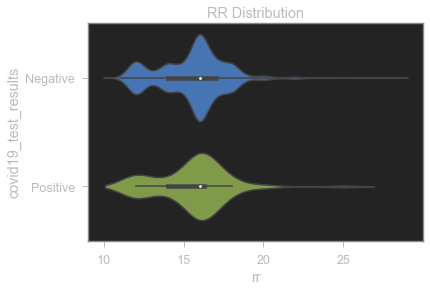

In [129]:
sns.violinplot(x=data.rr, y=data.covid19_test_results)
plt.title('RR Distribution')

Text(0.5, 1.0, 'RR Distribution')

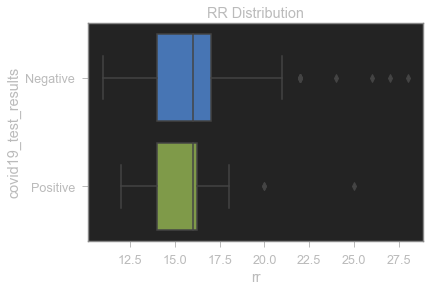

In [130]:
sns.boxplot(x=data.rr, y=data.covid19_test_results)
plt.title('RR Distribution')

In [131]:
data.loc[data['covid19_test_results'] == 'Negative' ].rr.isnull().sum()
# missing Values for Negative patients

309

In [132]:
data.loc[data['covid19_test_results'] == 'Positive' ].rr.isnull().sum()
# Missing values for Positive patients

29

In [133]:
mean_pos_r = data.loc[data['covid19_test_results'] == 'Positive' ].rr.mean()
# Mean for Positive Patients
mean_pos_r

15.541666666666666

In [134]:
mean_neg_r = data.loc[data['covid19_test_results'] == 'Negative' ].rr.mean()
# Mean for Positive Patients 
mean_neg_r

15.549166666666666

In [135]:
data.rr = data.rr.fillna(mean_pos_r)
# As there is no much difference between there mean so we filled it with cumulative mean

In [136]:
data.rr.isnull().sum()

0

In [137]:
data.rr.astype(int)
data.rr.unique()

array([12.        , 18.        , 16.        , 14.        , 15.54166667,
       13.        , 27.        , 17.        , 22.        , 24.        ,
       15.        , 20.        , 19.        , 11.        , 21.        ,
       28.        , 26.        , 25.        ])

# <font size="+0.5" color=orange ><b>  Rhonchi </b></font>

In [138]:
data.rhonchi.value_counts()

0.0    1231
1.0      38
Name: rhonchi, dtype: int64

In [139]:
data.rhonchi = data.rhonchi.fillna(0.0)
# Filling with False the missing values

In [140]:
data.rhonchi = labelencoder.fit_transform(data.rhonchi)
data.rhonchi.astype(int)
data.rhonchi.unique()

array([0, 1], dtype=int64)

In [141]:
data.rhonchi.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Shortness of Breath. </b></font>

In [142]:
data.sob.value_counts()

0.0    795
1.0    463
Name: sob, dtype: int64

In [143]:
data.sob = data.sob.fillna('None')

In [144]:
data.sob = np.multiply(data.sob, 1)
# Converting Boolean to integar

In [145]:
data.sob.isnull().sum()

0

In [146]:
data.sob = data.sob.astype(bool)
data.sob.describe()

count     1610
unique       2
top       True
freq       815
Name: sob, dtype: object

In [147]:
data.sob = labelencoder.fit_transform(data.sob)
data.sob.astype(int)
data.sob.unique()

array([0, 1], dtype=int64)

# <font size="+0.5" color=orange ><b>  Cough </b></font>

In [148]:
data.cough.value_counts()

1.0    750
0.0    508
Name: cough, dtype: int64

In [149]:
data.cough.isnull().sum()

352

In [150]:
data.cough = data.cough.fillna('None')

In [151]:
data.cough = data.cough.astype(bool)
data.cough.describe()

count     1610
unique       2
top       True
freq      1102
Name: cough, dtype: object

In [152]:
data.cough = labelencoder.fit_transform(data.cough)
data.cough.astype(int)
data.cough.unique()

array([0, 1], dtype=int64)

In [153]:
data.cough.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Occupation </b></font>

In [154]:
data.high_risk_exposure_occupation.value_counts()

0.0    694
1.0    453
Name: high_risk_exposure_occupation, dtype: int64

In [155]:
data.high_risk_exposure_occupation.isnull().sum()

463

In [156]:
data.high_risk_exposure_occupation = data.high_risk_exposure_occupation.fillna('None')

In [157]:
data.high_risk_exposure_occupation = data.high_risk_exposure_occupation.astype(bool)
data.high_risk_exposure_occupation.describe()

count     1610
unique       2
top       True
freq       916
Name: high_risk_exposure_occupation, dtype: object

In [158]:
data.high_risk_exposure_occupation = labelencoder.fit_transform(data.high_risk_exposure_occupation)
data.high_risk_exposure_occupation.astype(int)
data.high_risk_exposure_occupation.unique()

array([1, 0], dtype=int64)

In [159]:
data.high_risk_exposure_occupation.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Days since symtoms onset </b></font>

In [160]:
data.days_since_symptom_onset.value_counts()

7.0      134
3.0      133
2.0      110
5.0      107
4.0       84
14.0      78
1.0       47
21.0      37
10.0      30
28.0      20
30.0      17
60.0       3
35.0       3
120.0      2
49.0       2
150.0      2
90.0       1
70.0       1
Name: days_since_symptom_onset, dtype: int64

In [161]:
data.days_since_symptom_onset.isnull().sum()

799

Text(0.5, 1.0, 'Days Symtoms Onset Distribution')

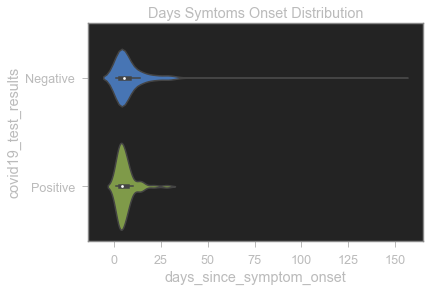

In [162]:
sns.violinplot(x=data.days_since_symptom_onset, y=data.covid19_test_results)
plt.title('Days Symtoms Onset Distribution')

Text(0.5, 1.0, 'Days Symtoms Onset Distribution')

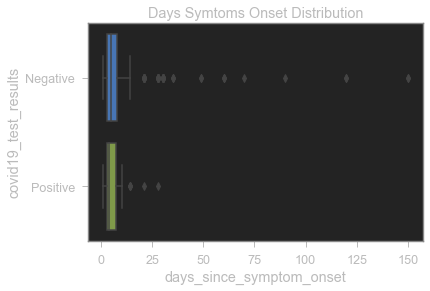

In [163]:
sns.boxplot(x=data.days_since_symptom_onset, y=data.covid19_test_results)
plt.title('Days Symtoms Onset Distribution')

In [164]:
data.loc[data['covid19_test_results'] == 'Negative' ].days_since_symptom_onset.isnull().sum()

753

In [165]:
data.loc[data['covid19_test_results'] == 'Positive' ].days_since_symptom_onset.isnull().sum()

46

In [166]:
mode_neg = data.loc[m1 , 'days_since_symptom_onset'].median()
mode_neg

5.0

In [167]:
mode_pos = data.loc[m2 , 'days_since_symptom_onset'].median()
mode_pos

4.0

In [168]:
data.loc[m1 , 'days_since_symptom_onset'] = data.loc[m1 , 'days_since_symptom_onset'].fillna(mode_neg) # filling median value
data.loc[m2 , 'days_since_symptom_onset'] = data.loc[m2 , 'days_since_symptom_onset'].fillna(mode_pos) # filling median value

In [169]:
data.days_since_symptom_onset.astype(int)

0        5
1       14
2        7
3        5
4        5
        ..
1606     5
1607     2
1608     5
1609     7
1610     1
Name: days_since_symptom_onset, Length: 1610, dtype: int32

In [170]:
data.days_since_symptom_onset.isnull().sum()

0


# <font size="+0.5" color=orange ><b>  High Risk Interaction </b></font>

In [171]:
data.high_risk_interactions.value_counts()

0.0    442
1.0    276
Name: high_risk_interactions, dtype: int64

In [172]:
data.high_risk_interactions.isnull().sum()

892

In [173]:
data.high_risk_interactions = data.high_risk_interactions.fillna('None')

In [174]:
data.high_risk_interactions = data.high_risk_interactions.astype(bool)
data.high_risk_interactions.describe()

count     1610
unique       2
top       True
freq      1168
Name: high_risk_interactions, dtype: object

In [175]:
data.high_risk_interactions = labelencoder.fit_transform(data.high_risk_interactions)
data.high_risk_interactions.astype(int)
data.high_risk_interactions.unique()

array([1, 0], dtype=int64)

In [176]:
data.high_risk_interactions.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Cough Severity </b></font>

In [177]:
data.cough_severity.value_counts()

Mild        344
Moderate    325
Severe       40
Name: cough_severity, dtype: int64

In [178]:
data.cough_severity.isnull().sum()

901

In [179]:
data.cough_severity = data.cough_severity.fillna('None')

In [180]:
data.cough_severity = labelencoder.fit_transform(data.cough_severity)
data.cough_severity.astype(int)
data.cough_severity.unique()

array([2, 1, 0, 3], dtype=int64)

In [181]:
data.cough_severity.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Fever </b></font>

In [182]:
data.fever.value_counts()

0.0    379
1.0    319
Name: fever, dtype: int64

In [183]:
data.fever = data.fever.fillna('None')

In [184]:
data.fever = data.fever.astype(bool)
data.fever.describe()

count     1610
unique       2
top       True
freq      1231
Name: fever, dtype: object

In [185]:
data.fever = labelencoder.fit_transform(data.fever)
data.fever.astype(int)
data.fever.unique()

array([0, 1], dtype=int64)

In [186]:
data.fever.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  SOB Severity </b></font>

In [187]:
data.sob_severity.value_counts()

Moderate    223
Mild        168
Severe       36
Name: sob_severity, dtype: int64

In [188]:
data.sob_severity =data.sob_severity.fillna('None')

In [189]:
data.sob_severity = labelencoder.fit_transform(data.sob_severity)
data.sob_severity.astype(int)
data.sob_severity.unique()

array([2, 0, 3, 1], dtype=int64)

In [190]:
data.sob_severity.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Fatigue </b></font>

In [191]:
data.fatigue.value_counts()

1.0    279
0.0    123
Name: fatigue, dtype: int64

In [192]:
data.fatigue = data.fatigue.fillna('None')

In [193]:
data.fatigue = data.fatigue.astype(bool)
data.fatigue.describe()

count     1610
unique       2
top       True
freq      1487
Name: fatigue, dtype: object

In [194]:
data.fatigue = labelencoder.fit_transform(data.fatigue)
data.fatigue.astype(int)
data.fatigue.unique()

array([1, 0], dtype=int64)

In [195]:
data.fatigue.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Headache </b></font>

In [196]:
data.headache.value_counts()

1.0    258
0.0    121
Name: headache, dtype: int64

In [197]:
data.headache = data.headache.fillna('None')

In [198]:
data.headache = data.headache.astype(bool)
data.headache.describe()

count     1610
unique       2
top       True
freq      1489
Name: headache, dtype: object

In [199]:
data.headache = labelencoder.fit_transform(data.headache)
data.headache.astype(int)
data.headache.unique()

array([1, 0], dtype=int64)

In [200]:
data.headache.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Sore Throat </b></font>

In [201]:
data.sore_throat.isnull().sum()

1293

In [202]:
data.sore_throat.value_counts()

1.0    190
0.0    127
Name: sore_throat, dtype: int64

In [203]:
data.sore_throat = data.sore_throat.fillna('None')

In [204]:
data.sore_throat = data.sore_throat.astype(bool)
data.sore_throat.describe()

count     1610
unique       2
top       True
freq      1483
Name: sore_throat, dtype: object

In [205]:
data.sore_throat = labelencoder.fit_transform(data.sore_throat)
data.sore_throat.astype(int)
data.sore_throat.unique()

array([1, 0], dtype=int64)

In [206]:
data.sore_throat.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  CXR Link ( dagnostic quality radiology images, with annotations and report) </b></font>

In [207]:
data = data.drop('cxr_link',axis=1)
# There are just  link which resembles to the cxr_impression

# <font size="+0.5" color=orange ><b>  Muscle sore </b></font>

In [208]:
data.muscle_sore.value_counts()

1.0    166
0.0    136
Name: muscle_sore, dtype: int64

In [209]:
data.muscle_sore = data.muscle_sore.fillna('None')

In [210]:
data.muscle_sore = data.muscle_sore.astype(bool)
data.muscle_sore.describe()

count     1610
unique       2
top       True
freq      1474
Name: muscle_sore, dtype: object

In [211]:
data.muscle_sore = labelencoder.fit_transform(data.muscle_sore)
data.muscle_sore.astype(int)
data.muscle_sore.unique()

array([1, 0], dtype=int64)

In [212]:
data.muscle_sore.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  CXR Impression </b></font>

In [213]:
data.cxr_impression.describe()

count                             301
unique                             94
top       No significant abnormality.
freq                              137
Name: cxr_impression, dtype: object

In [214]:
data.cxr_impression.isnull().sum()
#missing values

1309

In [215]:
data.cxr_impression.mode() # taking the mode as there are 94 unique values

0    No significant abnormality.
dtype: object

In [216]:
data.cxr_impression = data.cxr_impression.fillna('No significant abnormality.')
# filling missing data with mode

In [217]:
data.cxr_impression = labelencoder.fit_transform(data.cxr_impression)
# Converting Categorical variable to integar
data.cxr_impression.astype(int)
data.cxr_impression.unique()

array([54, 73, 44, 75, 51, 69, 47, 38, 43, 91, 53, 22, 71, 46, 92, 45, 32,
       39, 80, 28, 14, 36,  1, 13, 52, 77, 11,  7, 26, 50, 89, 21,  8, 18,
       15, 37, 17, 10, 24,  9, 88, 16, 67, 93, 70, 12, 48, 33, 83, 90,  3,
       60, 76,  0, 27, 81, 20, 55, 68, 42, 34, 19, 57, 58,  5, 84, 85,  4,
       59, 86, 74, 62, 29, 56, 49, 79, 78, 72, 65, 82,  2,  6, 41, 25, 31,
       30, 40, 23, 64, 61, 87, 35, 66, 63], dtype=int64)

In [218]:
data.cxr_impression.isnull().sum()
# missing check

0

# <font size="+0.5" color=orange ><b>  CXR Findings </b></font>

In [219]:
data.cxr_findings.describe()

count                                                   301
unique                                                  116
top       The cardiac silhouette is normal.\nThere is no...
freq                                                    119
Name: cxr_findings, dtype: object

In [220]:
data.cxr_findings.isnull().sum()
#missing values

1309

In [221]:
data.cxr_findings = data.cxr_findings.fillna('None')

In [222]:
data.cxr_findings = labelencoder.fit_transform(data.cxr_findings)
# Converting Categorical variable to integar
data.cxr_findings.astype(int)
data.cxr_findings.unique()

array([ 11,  67,  84,   7,  44,  93,  10, 100,  59, 101,  76,  30,  50,
       102,   4, 115,  12, 112,  66,  60, 105, 106, 107,  26,  25,  70,
        98,  53,  38,  97,  32,  29,  80,  99,  61,  79, 109,  17,  13,
       103,  42, 111,  96,  18,  24,   0,  31,  88, 104,  14,  73,  19,
        86,   5,  90, 114,  85,   1, 116,  95,  89,  22,  48, 108,  49,
       110,  35,  75,  63,  56,  54,  82,  77,  27,  69,  74,  68,  15,
         8,  21,  41,  91,  83,  28,  45,  64,  33, 113,  81,  92,  47,
        51,  40,  43,  71,  34,  36,  65,  58,  78,  62,  39,  16,   6,
        57,   3,   2,   9,  72,  55,  20,  87,  23,  52,  46,  94,  37],
      dtype=int64)

In [223]:
data.cxr_findings.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Runny Nose </b></font>

In [224]:
data.runny_nose.unique()

array([nan,  1.,  0.])

In [225]:
data.runny_nose.value_counts()

0.0    134
1.0    114
Name: runny_nose, dtype: int64

In [226]:
data.runny_nose = data.runny_nose.fillna('None')

In [227]:
data.runny_nose = data.runny_nose.astype(bool)
data.runny_nose.describe()

count     1610
unique       2
top       True
freq      1476
Name: runny_nose, dtype: object

In [228]:
data.runny_nose = labelencoder.fit_transform(data.runny_nose)
data.runny_nose.astype(int)
data.runny_nose.unique()

array([1, 0], dtype=int64)

In [229]:
data.runny_nose.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Diarrhea </b></font>

In [230]:
data.diarrhea.value_counts()

0.0    140
1.0     95
Name: diarrhea, dtype: int64

In [231]:
data.diarrhea.isnull().sum()

1375

In [232]:
data.diarrhea = data.diarrhea.fillna('None')

In [233]:
data.diarrhea = data.diarrhea.astype(bool)
data.diarrhea.describe()

count     1610
unique       2
top       True
freq      1470
Name: diarrhea, dtype: object

In [234]:
data.diarrhea = labelencoder.fit_transform(data.diarrhea)
data.diarrhea.astype(int)
data.diarrhea.unique()

array([1, 0], dtype=int64)

In [235]:
data.diarrhea.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Loss of Smell </b></font>

In [236]:
data.loss_of_smell.value_counts()

0.0    142
1.0     43
Name: loss_of_smell, dtype: int64

In [237]:
data.loss_of_smell.isnull().sum()

1425

In [238]:
data.loss_of_smell = data.loss_of_smell.fillna('None')

In [239]:
data.loss_of_smell = data.loss_of_smell.astype(bool)
data.loss_of_smell.describe()

count     1610
unique       2
top       True
freq      1468
Name: loss_of_smell, dtype: object

In [240]:
data.loss_of_smell = labelencoder.fit_transform(data.loss_of_smell)
data.loss_of_smell.astype(int)
data.loss_of_smell.unique()

array([1, 0], dtype=int64)

In [241]:
data.loss_of_smell.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Loss of Taste </b></font>

In [242]:
data.loss_of_taste.value_counts()

0.0    143
1.0     38
Name: loss_of_taste, dtype: int64

In [243]:
data.loss_of_taste.isnull().sum()

1429

In [244]:
data.loss_of_taste = data.loss_of_taste.fillna('None')

In [245]:
data.loss_of_taste = data.loss_of_taste.astype(bool)
data.loss_of_taste.describe()

count     1610
unique       2
top       True
freq      1467
Name: loss_of_taste, dtype: object

In [246]:
data.loss_of_taste = labelencoder.fit_transform(data.loss_of_taste)
data.loss_of_taste.astype(int)
data.loss_of_taste.unique()

array([1, 0], dtype=int64)

In [247]:
data.loss_of_taste.isnull().sum()

0

# <font size="+0.5" color=orange ><b>  Rapid Flu Results </b></font>

In [248]:
data.rapid_flu_results.value_counts()

Negative    165
Positive      2
Name: rapid_flu_results, dtype: int64

In [249]:
data.loc[data['covid19_test_results'] == 'Negative' ].rapid_flu_results.isnull().sum()
#missing value in Negative patients

1352

In [250]:
data.loc[data['covid19_test_results'] == 'Positive' ].rapid_flu_results.isnull().sum()
# there seems no missing value in positive patients

91

In [251]:
data.rapid_flu_results = data.rapid_flu_results.fillna('Negative')
# filling with the mode

In [252]:
data.rapid_flu_results = labelencoder.fit_transform(data.rapid_flu_results)
# Converting Categorical variable to integar

In [253]:
data.rapid_flu_results.isnull().sum()

0

In [254]:
data.rapid_flu_results.value_counts()

0    1608
1       2
Name: rapid_flu_results, dtype: int64

# <font size="+0.5" color=orange ><b>  Rapid Strep Results </b></font>

In [255]:
data.rapid_strep_results.value_counts()

Negative    59
Positive     3
Name: rapid_strep_results, dtype: int64

In [256]:
data.loc[data['covid19_test_results'] == 'Negative' ].rapid_strep_results.isnull().sum()
#missing value in Negative patients

1449

In [257]:
data.loc[data['covid19_test_results'] == 'Positive' ].rapid_strep_results.isnull().sum()
# there seems no missing value in positive patients

99

In [258]:
data.rapid_strep_results = data.rapid_strep_results.fillna('Negative')
# filling with the mode

In [259]:
data.rapid_strep_results = labelencoder.fit_transform(data.rapid_strep_results)
# Converting Categorical variable to integar

In [260]:
data.rapid_strep_results.isnull().sum()

0

In [261]:
data.rapid_strep_results.value_counts()

0    1607
1       3
Name: rapid_strep_results, dtype: int64

# <font size="+2" color=orange ><b> <u> Data Cleaning  </u></b></font>

In [262]:
data.head(10)

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression
0,3,1,Negative,36,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,11,54
1,3,1,Negative,35,0,1,0,0,0,0,...,1,1,1,1,1,1,1,1,11,54
2,1,2,Negative,18,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,11,54
3,3,1,Negative,46,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,11,54
4,1,1,Negative,29,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,11,54
5,4,1,Negative,21,0,1,0,0,0,0,...,1,1,1,1,1,1,1,1,11,54
6,3,1,Negative,38,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,11,54
7,1,1,Positive,44,0,1,0,0,0,0,...,1,1,1,1,1,1,1,1,11,54
8,3,0,Negative,24,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,67,54
9,0,0,Negative,28,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,67,54


In [263]:
# Independant variable 

In [264]:
data.covid19_test_results = labelencoder.fit_transform(data.covid19_test_results)
# Converting Categorical variable to integar
data.covid19_test_results.describe()

count    1610.000000
mean        0.062733
std         0.242557
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: covid19_test_results, dtype: float64

In [265]:
data.covid19_test_results = data.covid19_test_results.astype(int)
data.covid19_test_results.unique()

array([0, 1], dtype=int64)

In [266]:
data.dtypes.value_counts()

int64      25
int32       9
float64     7
dtype: int64

In [267]:
data.columns

Index(['test_name', 'swab_type', 'covid19_test_results', 'age',
       'high_risk_exposure_occupation', 'high_risk_interactions', 'diabetes',
       'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis',
       'temperature', 'pulse', 'sys', 'dia', 'rr', 'sats', 'rapid_flu_results',
       'rapid_strep_results', 'days_since_symptom_onset', 'ctab',
       'labored_respiration', 'rhonchi', 'wheezes', 'cough', 'cough_severity',
       'fever', 'sob', 'sob_severity', 'diarrhea', 'fatigue', 'headache',
       'loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore',
       'sore_throat', 'cxr_findings', 'cxr_impression'],
      dtype='object')

In [268]:
data.head()

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression
0,3,1,0,36,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,11,54
1,3,1,0,35,0,1,0,0,0,0,...,1,1,1,1,1,1,1,1,11,54
2,1,2,0,18,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,11,54
3,3,1,0,46,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,11,54
4,1,1,0,29,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,11,54


# <font size="+2" color=orange ><b> <u> Correlation  </u></b></font>

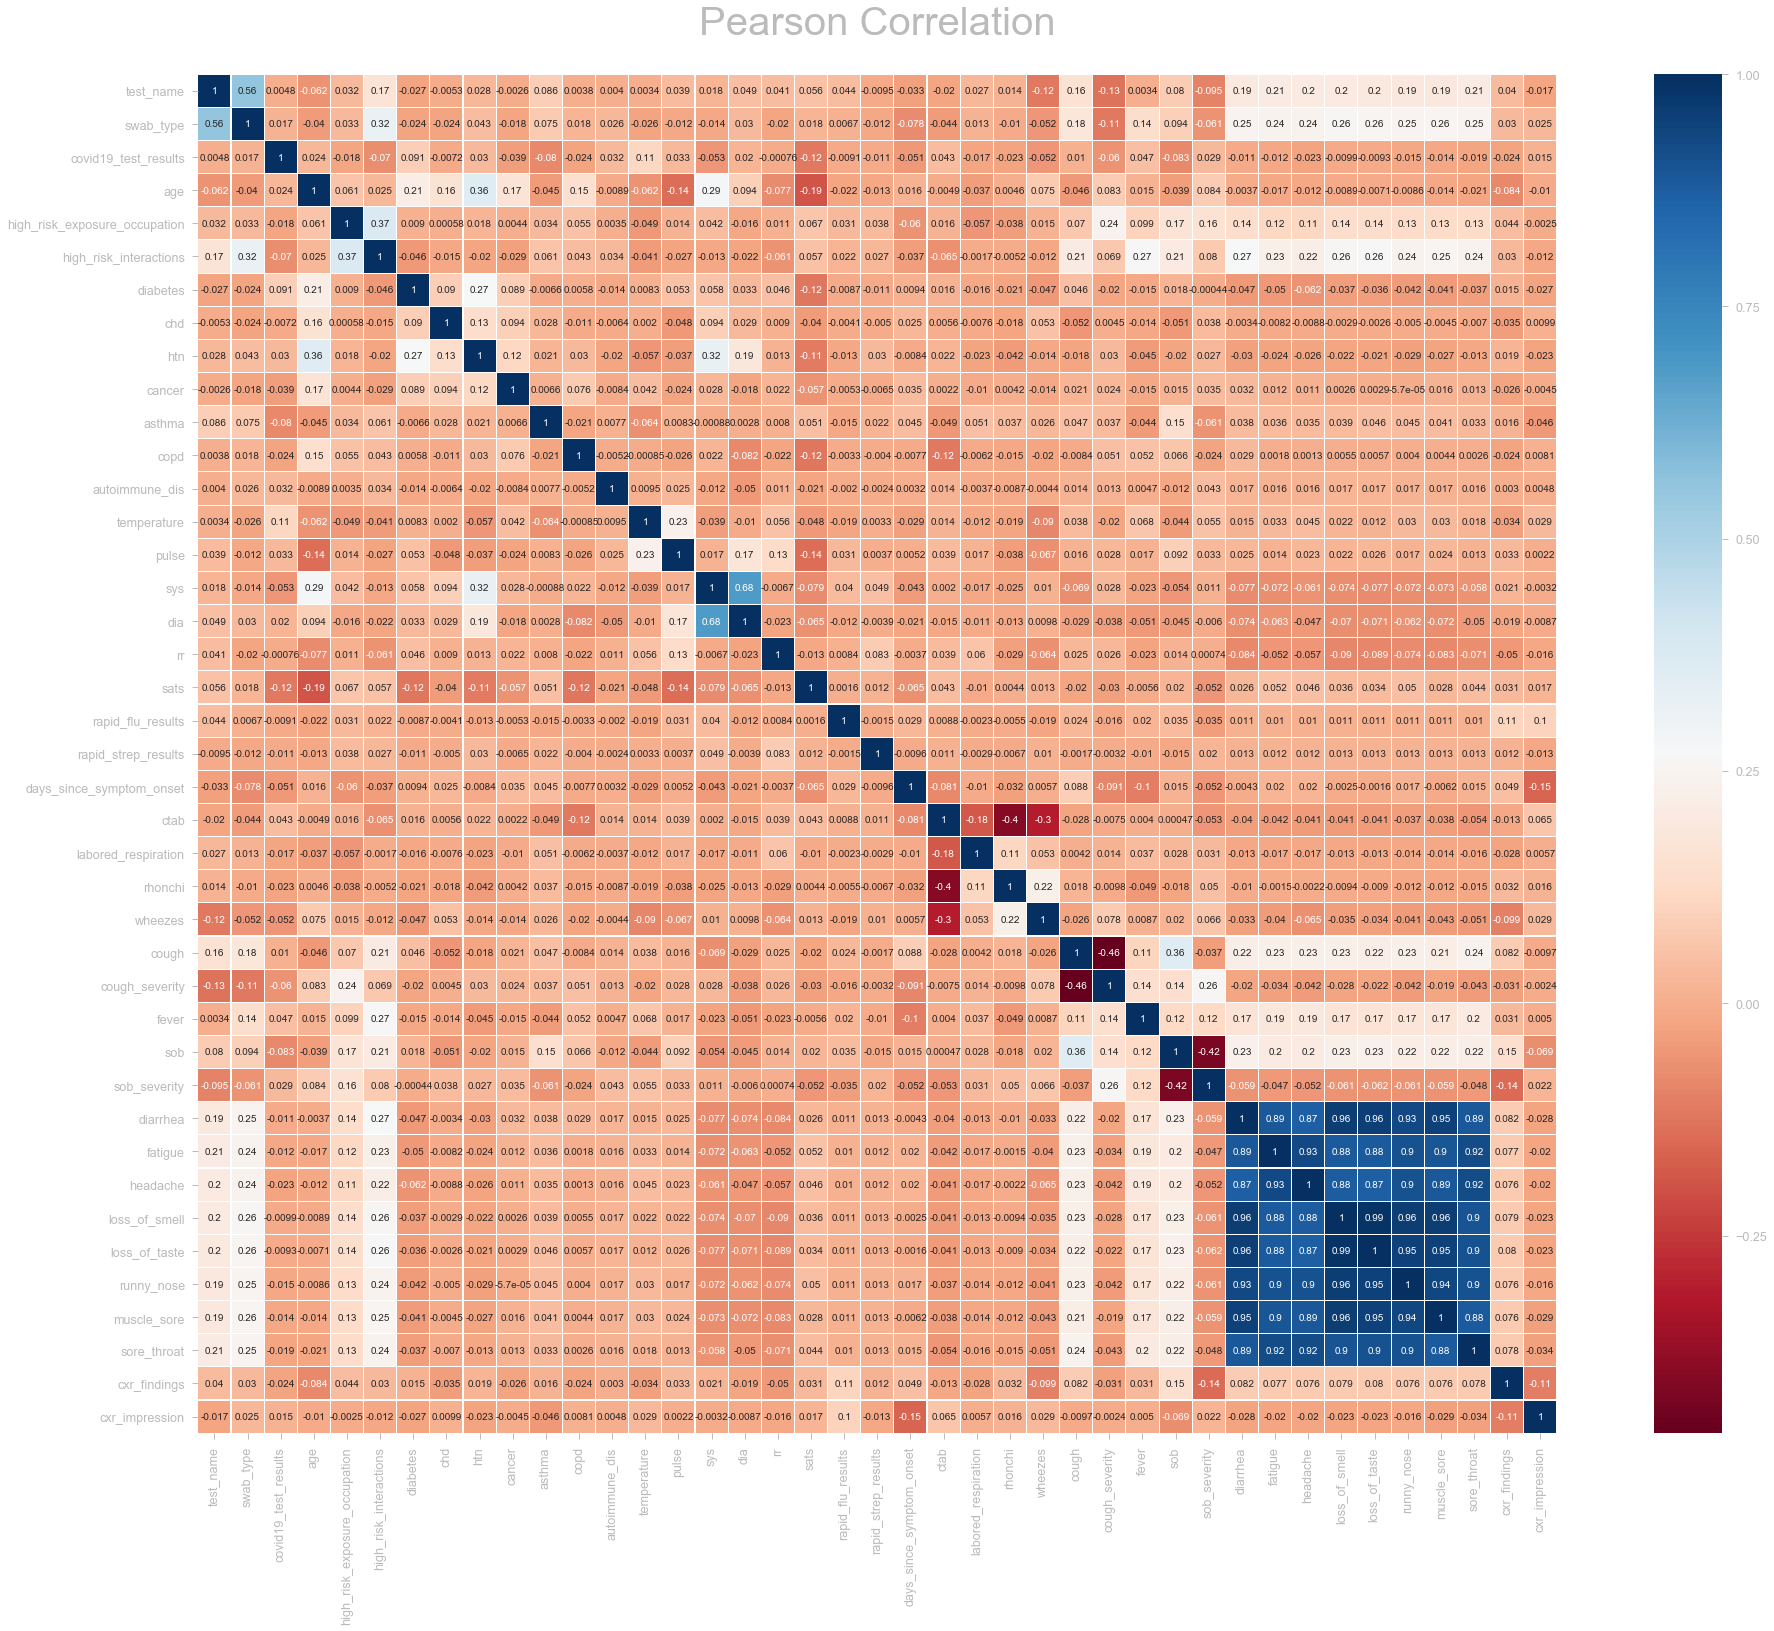

In [269]:
colormap = plt.cm.RdBu  # declaring the color pattern (mentioned as in : https://matplotlib.org/examples/color/colormaps_reference.html)
plt.figure(figsize=(35,25))
plt.title('Pearson Correlation', y=1.025, size=40)  # 'y' is position of title (where zero is centre of the image)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

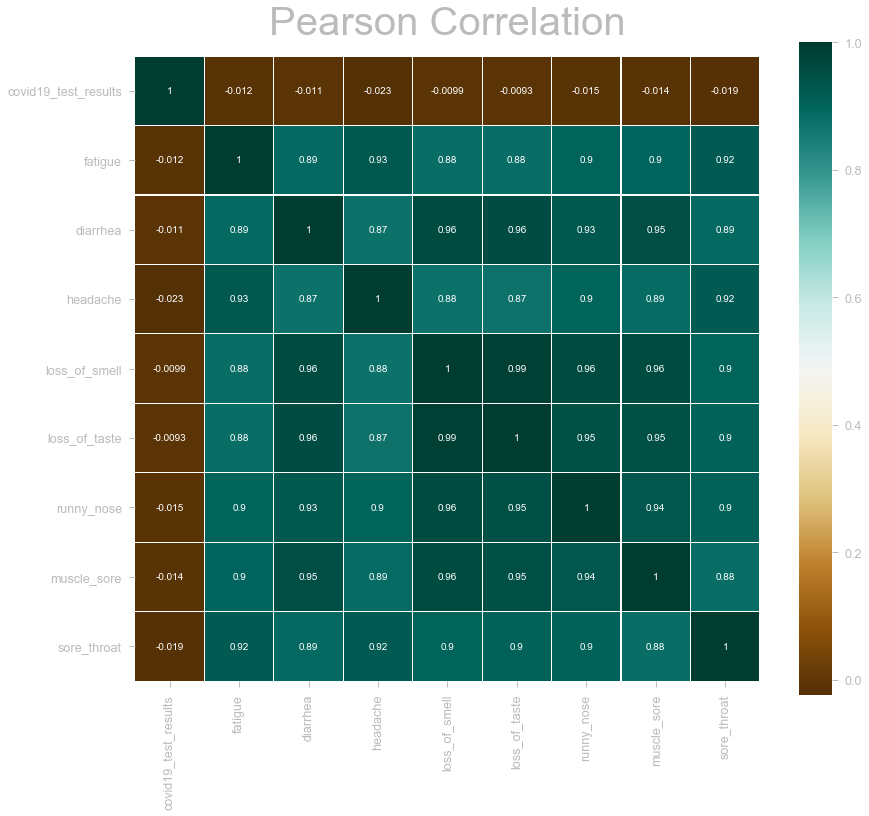

In [270]:
colormap = plt.cm.BrBG  # declaring the color pattern (mentioned as in : https://matplotlib.org/examples/color/colormaps_reference.html)
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation', y=1.025, size=40)  # 'y' is position of title (where zero is centre of the image)
sns.heatmap(data[['covid19_test_results','fatigue','diarrhea','headache','loss_of_smell','loss_of_taste','runny_nose','muscle_sore','sore_throat']].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [271]:
data.shape

(1610, 41)

In [272]:
Y = data.covid19_test_results
X =  data.drop('covid19_test_results',axis=1)


In [273]:
X_with_constant = sm.add_constant(X)
model = sm.OLS(data.covid19_test_results,X)
results = model.fit()
print(results.summary())

# This model is used for linear regression dont add i just try to used it for the 
#multicorlenearity purpose u can see it in the 2nd warning given below i.e;

'''
Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.88e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

'''

                                  OLS Regression Results                                 
Dep. Variable:     covid19_test_results   R-squared (uncentered):                   0.132
Model:                              OLS   Adj. R-squared (uncentered):              0.110
Method:                   Least Squares   F-statistic:                              5.983
Date:                  Thu, 09 Jul 2020   Prob (F-statistic):                    1.08e-27
Time:                          02:56:53   Log-Likelihood:                          58.663
No. Observations:                  1610   AIC:                                     -37.33
Df Residuals:                      1570   BIC:                                      178.0
Df Model:                            40                                                  
Covariance Type:              nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
--

'\nWarnings:\n[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n[2] The smallest eigenvalue is 3.88e-25. This might indicate that there are\nstrong multicollinearity problems or that the design matrix is singular.\n\n'

# <font size="+2" color=orange ><b> <u> PCA (Principal Component Analysis)  </u></b></font>

In [274]:
# Well we can reduce the multi corlenearity using PCA (Principle Component Analysis)

In [275]:
data_std = StandardScaler().fit_transform(X)  
# Standardizing the Data

In [276]:
data_std[:2]

array([[ 1.2397459 ,  0.1903211 , -0.304636  ,  0.87042629,  0.6151623 ,
        -0.24618298, -0.11496025, -0.35478744, -0.15123381, -0.42161774,
        -0.09365858, -0.05581456, -0.52775133,  1.57540853,  0.87696616,
         1.01330225, -1.86491017,  1.43711088, -0.03526728, -0.04320686,
        -0.18509849,  0.2504122 , -0.06608186, -0.15547678, -0.55199652,
        -1.47285143,  0.71415253, -1.80222671, -1.01250049,  0.47246117,
         0.3086067 ,  0.28760542,  0.28506594,  0.31101486,  0.31221442,
         0.301307  ,  0.3037531 ,  0.29263838, -0.42097271,  0.08641815],
       [ 1.2397459 ,  0.1903211 , -0.37047009, -1.14886236,  0.6151623 ,
        -0.24618298, -0.11496025, -0.35478744, -0.15123381, -0.42161774,
        -0.09365858, -0.05581456,  0.86859977, -1.07633137,  0.56234855,
         0.18543463,  1.28948825,  1.43711088, -0.03526728, -0.04320686,
         0.80973722, -3.99341563, -0.06608186,  6.43182875,  1.81160561,
         0.67895511, -0.46753871, -1.80222671, -1.

In [277]:
pcA = PCA().fit(data_std) # fitting the data in pca

In [278]:
variance = pd.DataFrame(pcA.explained_variance_ratio_) # variance ratio step by step in ascending order as a data frame
np.cumsum(pcA.explained_variance_ratio_) # adding up the previus variances

array([0.19758136, 0.25296141, 0.30070567, 0.34475893, 0.38741568,
       0.42548662, 0.46092935, 0.49627518, 0.52623843, 0.55541745,
       0.58345132, 0.6104007 , 0.63626502, 0.66177211, 0.68668086,
       0.71091562, 0.73447831, 0.75740749, 0.77971228, 0.80092553,
       0.82107468, 0.84099837, 0.85947356, 0.87776545, 0.89511068,
       0.91072421, 0.92564354, 0.94013232, 0.95296528, 0.9652789 ,
       0.97490319, 0.9815144 , 0.98753768, 0.99207133, 0.99437627,
       0.99628184, 0.99786711, 0.99891108, 0.9997696 , 1.        ])

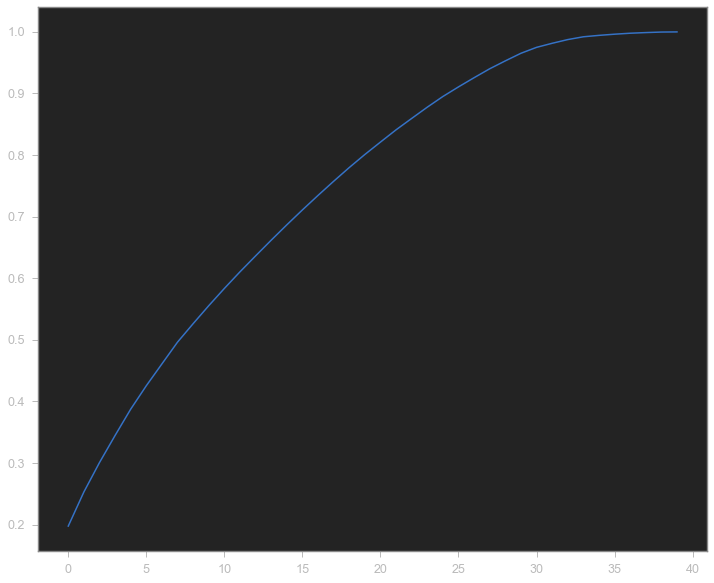

In [279]:
plt.figure(figsize=(12,10))
cumulative_explained_variance = np.cumsum(pcA.explained_variance_ratio_)
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
# plotting the varianc graph graph in cumsum manner

In [280]:
cumulative_explained_variance[30] # 30 variable explains 97% of variance

0.9749031889365556

In [281]:
pcA.explained_variance_ratio_ # variance showed by eaach feature individually

array([0.19758136, 0.05538005, 0.04774426, 0.04405326, 0.04265675,
       0.03807094, 0.03544273, 0.03534582, 0.02996326, 0.02917901,
       0.02803388, 0.02694937, 0.02586433, 0.02550708, 0.02490876,
       0.02423476, 0.02356269, 0.02292918, 0.02230478, 0.02121325,
       0.02014915, 0.01992369, 0.01847519, 0.01829189, 0.01734524,
       0.01561353, 0.01491933, 0.01448877, 0.01283296, 0.01231362,
       0.00962429, 0.00661121, 0.00602328, 0.00453365, 0.00230494,
       0.00190558, 0.00158526, 0.00104397, 0.00085852, 0.0002304 ])

In [282]:
pca = PCA(n_components=30) # 30 feature selected
PC_items = pca.fit_transform(data_std)
PC_items.shape

(1610, 30)

In [283]:
items_pca = pd.DataFrame(PC_items)
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]
items_pca.index = data.index
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-0.673821,0.676738,0.258800,-0.403433,-0.743756,-2.115426,-0.564557,-1.479129,-0.549485,0.023819,...,-1.136482,1.658152,0.650866,1.228121,0.238726,0.792074,-0.034897,0.460192,0.274135,0.127901
1,-0.738850,-0.587931,1.456665,3.660829,5.265771,-2.662663,0.285919,0.956003,-0.420784,0.484059,...,1.083375,0.061735,-0.772872,-1.577892,1.679463,0.821391,-0.177568,-0.144832,0.742296,-1.115806
2,-1.081925,-1.766830,-0.480793,-0.438997,0.106144,-0.584805,-1.081447,1.347564,0.607972,1.002095,...,-1.679713,0.772556,1.007534,0.401797,-0.421156,-0.137842,1.080736,-0.255673,-0.324138,-0.535173
3,-1.250351,0.355949,-0.513743,0.571028,-1.676757,-0.753896,0.694319,0.224655,0.136460,0.099454,...,0.117152,0.678741,0.050100,-0.370458,0.089909,0.686449,-0.910856,-0.157094,0.307013,0.443446
4,-1.218986,-1.192332,0.648265,0.683381,-1.348616,0.561152,-0.791565,-0.715083,0.377138,0.382138,...,-0.104118,0.501783,0.081695,0.370166,0.379770,0.814947,-0.134050,-0.956122,0.228361,0.082940


In [284]:
df = items_pca

# <font size="+2" color=orange ><b> <u> Splitting the Data (Stratified) </u></b></font>

In [285]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size=0.20, stratify= Y )
# Stratified split as there is high variance and bias in dat

In [286]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1288, 30), (322, 30), (1288,), (322,))

Text(0.5, 1.0, 'Patients Distribution Train Set')

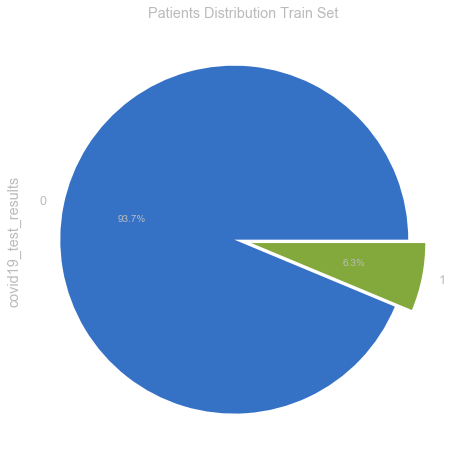

In [287]:
# Y-train distribution
plt.figure(figsize=(8,8))
Y_train.value_counts().plot(
    kind='pie', explode=(0.05, 0.05), autopct='%1.1f%%')
plt.title('Patients Distribution Train Set')

Text(0.5, 1.0, 'Patients Distribution Test Set')

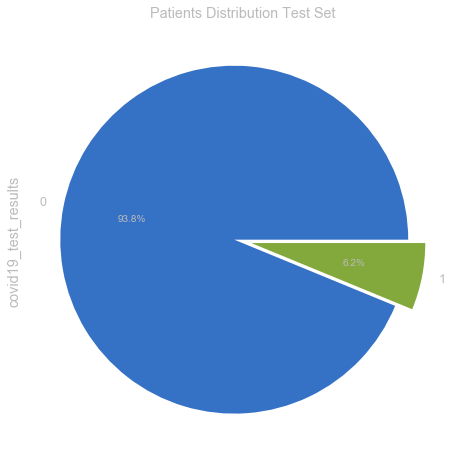

In [288]:
# Y-test distribution
plt.figure(figsize=(8,8))
Y_test.value_counts().plot(
    kind='pie', explode=(0.05, 0.05), autopct='%1.1f%%')
plt.title('Patients Distribution Test Set')

# <font size="+2" color=orange ><b> <u> Stratified K-fold Cross validation </u></b></font>

In [289]:
SKF = StratifiedKFold(n_splits=10,random_state=42) # 10 Stratified folds

In [290]:
SKF.get_n_splits(df, Y) # getting splits for data set

10

In [291]:
print(SKF) 

StratifiedKFold(n_splits=10, random_state=42, shuffle=False)


# <font size="+2" color=orange ><b> <u>  KNN or k-Nearest Neighbors  </u></b></font>

In [292]:
param_grid = {'n_neighbors':np.arange(1,50)}
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}

In [302]:
Neighbours_knn = []
Accuracy_knn = []
i=1
for train_index, test_index in SKF.split(df, Y):
    
    print('\n[Fold %d/%d]' % (i, SKF.n_splits)) # Fold Count
    print("\nStartified Split Ratio :    " + "TRAIN :", len(train_index), "    TEST :", len(test_index)) # Train test split count
    print('--------------------------------------------------------')
    
    X_tr, X_t, Y_tr, Y_t = train_test_split(df, Y, test_size=0.20, stratify= Y )
    
    knn = KNeighborsClassifier()
    clf= GridSearchCV(knn,param_grid)
    clf.fit(X_tr, Y_tr)
    print (clf.best_params_)
    pred=clf.predict(X_t)
    acc = accuracy_score(Y_t,pred)
    print('accuracy_score',acc)
    print('\n')
    Accuracy_knn.append(acc)s
    Neighbours_knn.append(clf.best_params_)
    i+=1
    


[Fold 1/10]

Startified Split Ratio :    TRAIN : 1448     TEST : 162
--------------------------------------------------------
{'n_neighbors': 8}
accuracy_score 0.937888198757764



[Fold 2/10]

Startified Split Ratio :    TRAIN : 1449     TEST : 161
--------------------------------------------------------
{'n_neighbors': 4}
accuracy_score 0.9347826086956522



[Fold 3/10]

Startified Split Ratio :    TRAIN : 1449     TEST : 161
--------------------------------------------------------
{'n_neighbors': 12}
accuracy_score 0.937888198757764



[Fold 4/10]

Startified Split Ratio :    TRAIN : 1449     TEST : 161
--------------------------------------------------------
{'n_neighbors': 10}
accuracy_score 0.937888198757764



[Fold 5/10]

Startified Split Ratio :    TRAIN : 1449     TEST : 161
--------------------------------------------------------
{'n_neighbors': 9}
accuracy_score 0.9316770186335404



[Fold 6/10]

Startified Split Ratio :    TRAIN : 1449     TEST : 161
---------------------

In [303]:
score_knn = np.array(Accuracy_knn).mean() # taking the average of the knn scores
print( 'ACUURACY :   ' + str(round(score_knn,4)*100) + ' %')

ACUURACY :   93.63 %


Text(0, 0.5, 'Cross-Validated Accuracy')

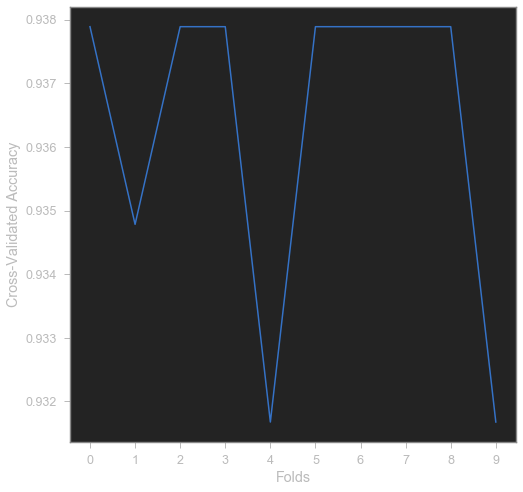

In [304]:
plt.figure(figsize=(8,8))
values=list(range(0,10))
plt.plot(values,Accuracy_knn)
plt.xticks(np.arange(0,10,1))
plt.xlabel('Folds')
plt.ylabel('Cross-Validated Accuracy')

In [309]:
score_knn = round(score_knn,4)*100

# <font size="+2" color=orange ><b> <u> Support Vector Machine</u></b></font>

In [306]:
SVC = SVC()
SVC.fit(X_train, Y_train)
SVC_Y_Pred = SVC.predict(X_test)
score_svc = round(SVC.score(X_test, Y_test)*100, 2)
score_svc

93.79

# <font size="+2" color=orange ><b> <u> Perceptron </u></b></font>

In [307]:

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
score_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
score_perceptron

88.82

# <font size="+2" color=orange ><b> <u> Evaluating Models </u></b></font>

In [310]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Perceptron'],
    'Score': [score_svc, score_knn,
              score_perceptron,
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,93.79
1,KNN,93.63
2,Perceptron,88.82
